## Imports

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

## Load data and get base info

In [2]:
df = pd.read_csv("../data/datasets/2021-11-30 21:10:43.416992.csv", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,179488,143207,148175,137064,86417,140882,133333,66603,78814,135985,...,0.5,2.0,1.0,1.0,1.0,128.0,128.0,16.0,2.0,4.0
1,217000,167666,175861,173748,114018,164957,151647,81046,100916,161555,...,4.0,2.0,1.0,8.0,1.0,128.0,128.0,16.0,8.0,4.0
2,177058,142827,141334,141134,95424,131291,126715,67735,81034,130750,...,4.0,2.0,16.0,8.0,16.0,128.0,128.0,4.0,16.0,4.0
3,526913,421950,429013,415132,281079,408112,390148,215883,245669,404273,...,4.0,16.0,16.0,8.0,16.0,128.0,128.0,8.0,16.0,4.0
4,229459,174821,183305,183706,118194,170429,156704,86224,107430,169982,...,4.0,16.0,1.0,1.0,1.0,0.0,32.0,16.0,16.0,4.0


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,400.000000,400.000000,4.000000e+02,...,400.000000,399.000000,399.000000,399.000000,399.000000,397.000000,393.000000,392.000000,390.000000,382.000000
mean,2.081785e+05,1.598347e+05,1.629532e+05,1.622549e+05,109329.167500,1.510835e+05,1.369705e+05,75492.830000,96758.412500,1.455626e+05,...,4.158750,9.383459,6.278195,6.929825,6.739348,62.127204,92.927481,9.854592,9.520513,3.307592
std,1.646239e+05,1.284510e+05,1.291370e+05,1.292015e+05,91794.643618,1.227376e+05,1.103589e+05,63360.033919,78016.704548,1.134116e+05,...,6.398655,12.599387,13.720296,2.761925,15.121193,61.845846,50.820668,5.987351,6.106875,1.345848
min,5.500000e+01,5.000000e+01,4.100000e+01,4.800000e+01,26.000000,3.800000e+01,5.200000e+01,25.000000,26.000000,3.600000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,0.500000
25%,1.095278e+05,8.060475e+04,8.344300e+04,8.348175e+04,56268.500000,7.725400e+04,7.054650e+04,38603.000000,48400.750000,7.695975e+04,...,4.000000,2.000000,1.000000,8.000000,1.000000,0.000000,32.000000,4.000000,2.000000,4.000000
50%,1.915815e+05,1.518785e+05,1.551445e+05,1.519020e+05,101521.000000,1.465180e+05,1.343910e+05,72327.000000,91097.500000,1.440605e+05,...,4.000000,4.000000,1.000000,8.000000,1.000000,64.000000,128.000000,8.000000,8.000000,4.000000
75%,2.559745e+05,1.940828e+05,1.982740e+05,1.991295e+05,135241.750000,1.849682e+05,1.659938e+05,91864.250000,120887.500000,1.774155e+05,...,4.000000,16.000000,8.000000,8.000000,16.000000,128.000000,128.000000,16.000000,16.000000,4.000000
max,1.315187e+06,1.298782e+06,1.209587e+06,1.170936e+06,994445.000000,1.336018e+06,1.227283e+06,570124.000000,704976.000000,1.002992e+06,...,128.000000,128.000000,128.000000,16.000000,128.000000,128.000000,128.000000,16.000000,16.000000,4.000000


In [5]:
df.shape

(400, 2100)

In [6]:
df.fillna(0, inplace=True)

## Create utils functions

In [12]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

## Running model

In [10]:
x = df.drop([2099], axis=1)
y = df[2099]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle=False)

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [30]:
model = lgb.LGBMRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

1.348828357534031
{'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.4, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.3, 'reg_lambda': 1.1, 'subsample': 0.9, 'subsample_freq': 20}


## Training model

In [32]:
params = model.best_params_

In [8]:
lgbm = lgb.LGBMRegressor(**params)

In [12]:
lgbm.fit(x_train, y_train)

LGBMRegressor(colsample_bytree=0.7, max_depth=15, min_split_gain=0.4,
              n_estimators=400, num_leaves=50, reg_alpha=1.3, reg_lambda=1.1,
              subsample=0.9, subsample_freq=20)

In [13]:
lgbm.score(x_test, y_test)

0.32807766240852265

In [14]:
y_pred=lgbm.predict(x_test)

In [15]:
y_pred

array([3.70089533, 3.01017898, 3.71096004, 3.52679865, 2.21336547,
       3.29103154, 2.41125123, 3.84998498, 3.59600504, 4.042103  ,
       3.42252415, 1.91663703, 3.28613718, 2.95056209, 3.63429433,
       1.12320472, 3.34689722, 3.52139401, 3.80740856, 3.68462781,
       3.660766  , 3.09088753, 3.64054747, 3.91936691, 1.54946103,
       3.19646707, 3.64338506, 3.55761274, 3.19646707, 3.39245548,
       3.77334836, 3.00419592, 3.69389125, 2.85978631, 3.57223925,
       3.49883446, 3.04856739, 2.5711254 , 3.93049105, 1.74739315,
       3.78299392, 3.25454848, 3.15617767, 3.74479696, 2.88601111,
       3.7373188 , 3.50867915, 3.17871254, 3.14963046, 3.62707231,
       2.69258263, 3.73890679, 2.99150648, 3.85887297, 3.32226032,
       3.78165109, 3.81660518, 4.04694874, 3.76729521, 2.03328233,
       0.48809734, 3.96506981, 3.34010335, 3.64219238, 2.89204688,
       2.19572182, 3.99954106, 3.12367288, 2.87868772, 4.16171656,
       3.52065831, 3.78915782, 3.73904829, 3.58719223, 3.41510

In [16]:
expected = list(y_test)

In [17]:
predicted = y_pred

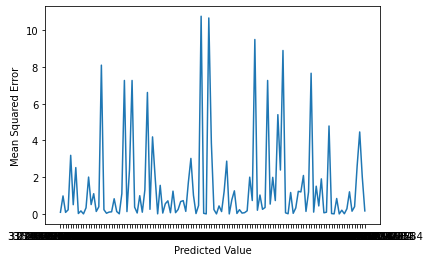

In [27]:
errors = list()
for i in range(len(expected)):
    # calculate error
    err = (expected[i] - predicted[i])**2
    # store error
    errors.append(err)
    # report error

# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

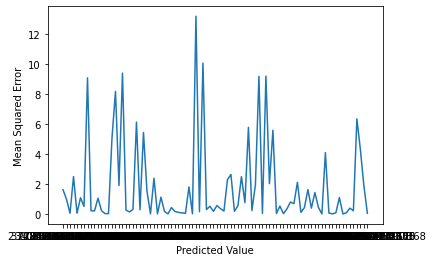

In [81]:
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

In [26]:
mse = mean_squared_error(expected, predicted, squared=True)
mae = mean_absolute_error(expected, predicted)
r2 = r2_score(expected, predicted)

# report error
print("MSE: ", mse)
print("MAE: ", mae)
print("R2: ", r2)

MSE:  1.4888562477280876
MAE:  0.9222309309940206
R2:  0.32807766240852265


In [ ]:
multi_regressor